### Loading required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from association import Association

### Loading tips dataset from seaborn library

In [5]:
# Loading tips dataset
tips = sns.load_dataset("tips")

# Print first five observations
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Converting categorical variables to object type

In [6]:
df = tips.apply(
        lambda x: x.astype("object") if x.dtype == "category" else x)

### Estimating pair-wise association and generating plot 

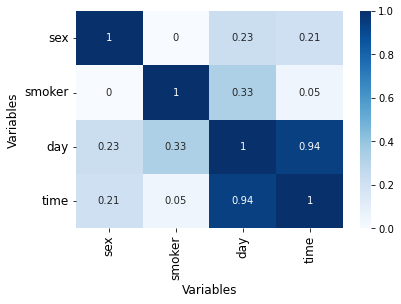

In [7]:
aos = Association(df, method = "cramer")
res = aos.fit()
ax = res["ax"]
fig = plt.gcf()

### Changing figure size

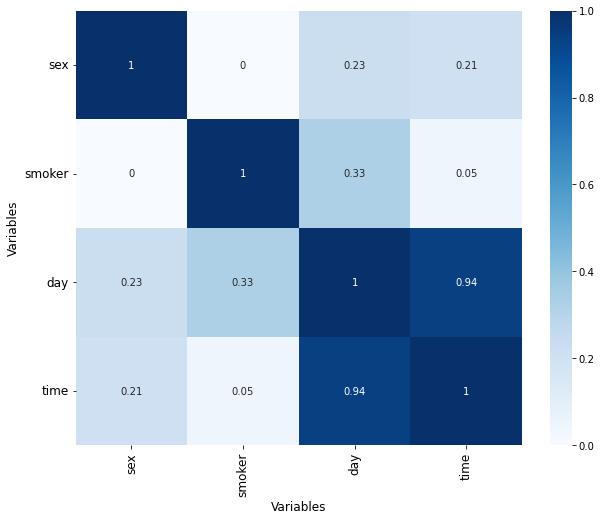

In [8]:
ax.figure.set_size_inches((10, 8))
fig

### Generating same plot using matplotlib and DataFrame stored in "res"

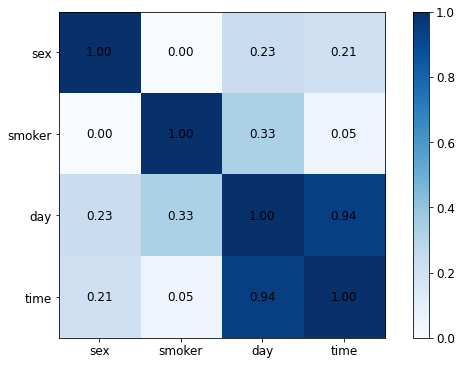

In [9]:
cfit = res["asso"]

# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)